In [1]:
from mne import read_epochs, set_eeg_reference
from mne.preprocessing import ICA, EOGRegression
import numpy as np
from mne.viz import plot_ica_components
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

Load and Preprocessing

In [4]:
import sys
sys.path.append('../../preprocessing')
from load_data import load_raw_to_epochs, get_channel_types

load_raw_to_epochs('mo.bdf', True)

Extracting EDF parameters from C:\Users\Alberto\Documents\BCI\data\mni\mo.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7913471  =      0.000 ...  3864.000 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 sec)



C:\Users\Alberto\Documents\BCI\data\mni\../../preprocessing\load_data.py:35: RuntimeWarning: DigMontage is only a subset of info. There are 8 channel positions not present in the DigMontage. The required channels are:

['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:   33.5s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   35.8s finished


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
138 events found
Event IDs: [    2     4   130   134   255 65536]
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 138 events and 20481 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1016 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 3896 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 7928 tasks      | elapsed:   10.0s
[Parallel(n_jobs=8)]: Done 10074 out of 10074 | elapsed:   12.4s finished


Overwriting existing file.
saved


In [3]:
raw = read_epochs('raw_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\mni\raw_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available


ValueError: selection must be shape (137,) got shape (138,)

In [ ]:
raw.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-5, events=raw.events, picks=['eeg','eog'])

Marking bad chanels

In [5]:
bads = ['EXG5', 'EXG7']
raw.info['bads'] = bads
raw.drop([8, 17, 20, 21, 22, 59, 60, 63, 72, 87])

Dropped 10 epochs: 8, 17, 20, 21, 22, 59, 60, 63, 72, 87


<EpochsFIF |  84 events (all good), -2 - 7.99902 sec, baseline off, ~479.2 MB, data loaded,
 'r_pinch': 17
 'r_stop': 16
 'left': 16
 'right': 14
 'rest': 21>

Referencing

In [6]:
referenced = set_eeg_reference(raw,ref_channels='average')[0]
del raw

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


set channel types

In [7]:
referenced.set_channel_types(get_channel_types())

<EpochsFIF |  84 events (all good), -2 - 7.99902 sec, baseline off, ~479.2 MB, data loaded,
 'r_pinch': 17
 'r_stop': 16
 'left': 16
 'right': 14
 'rest': 21>

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 4890 tasks      | elapsed:    7.5s
[Parallel(n_jobs=8)]: Done 5376 out of 5376 | elapsed:    8.0s finished


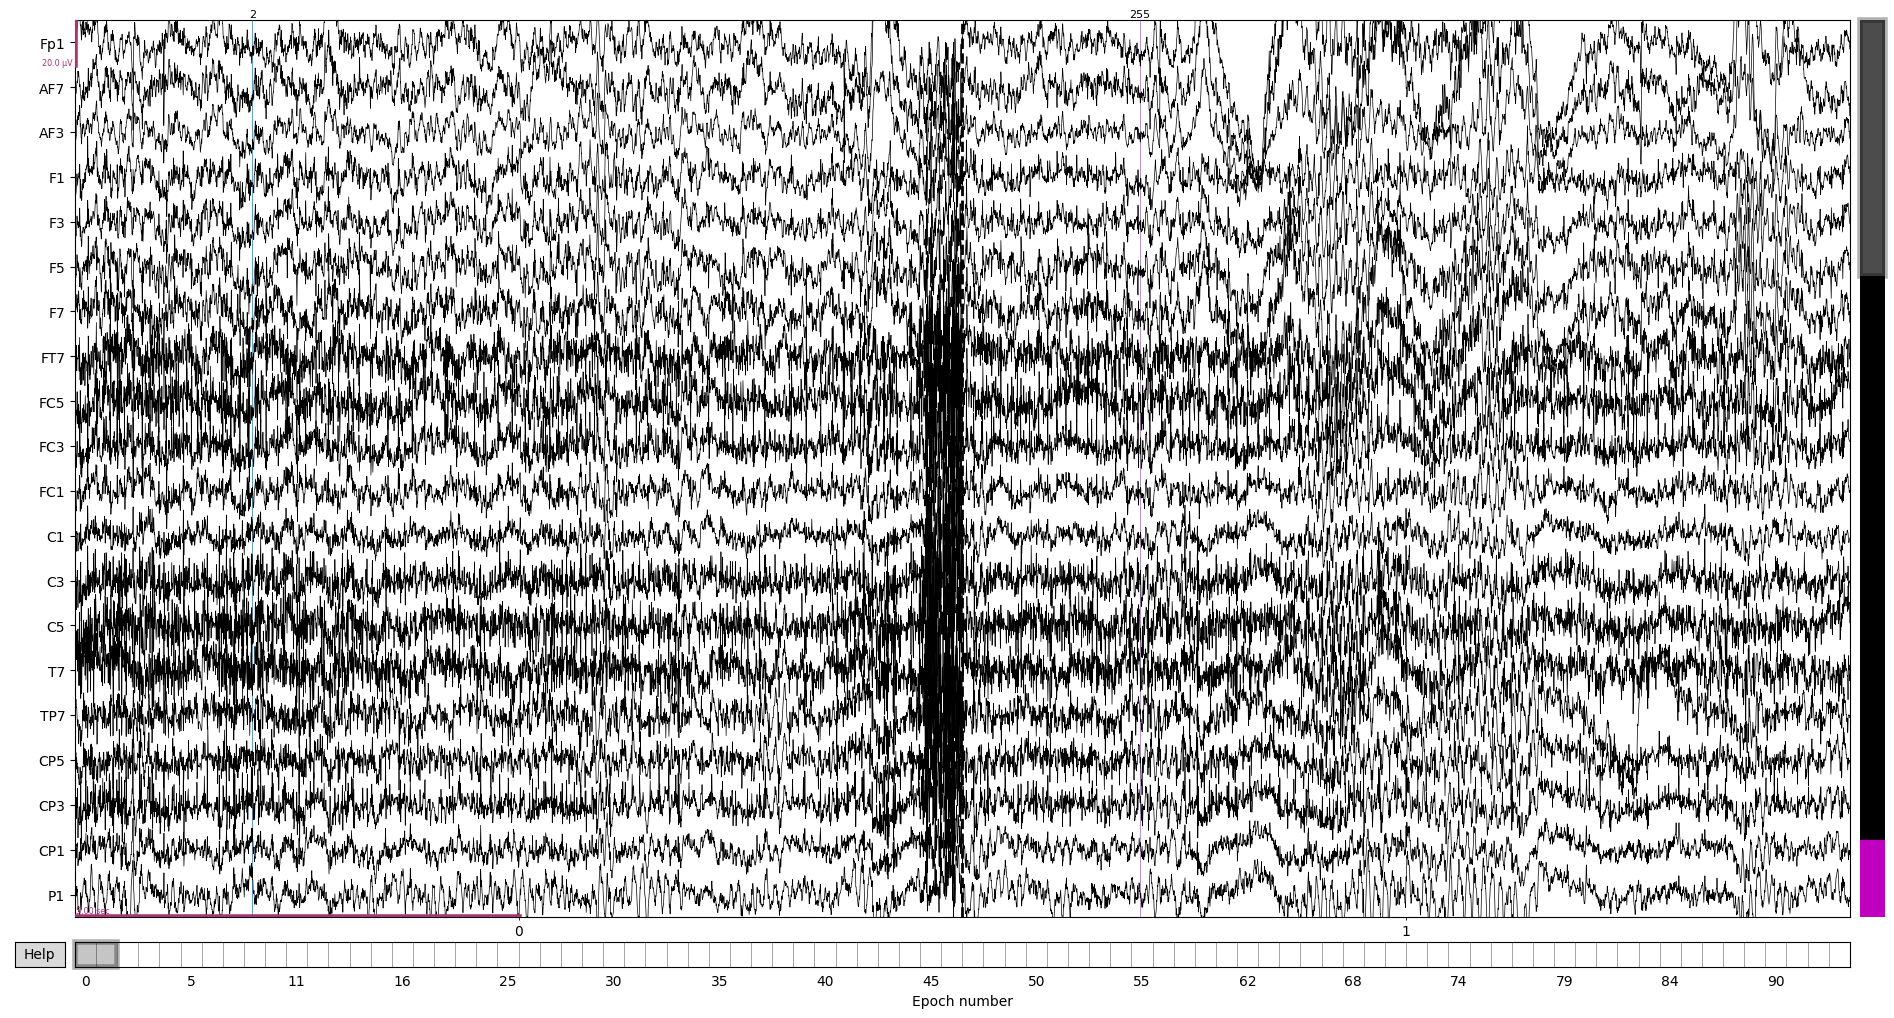

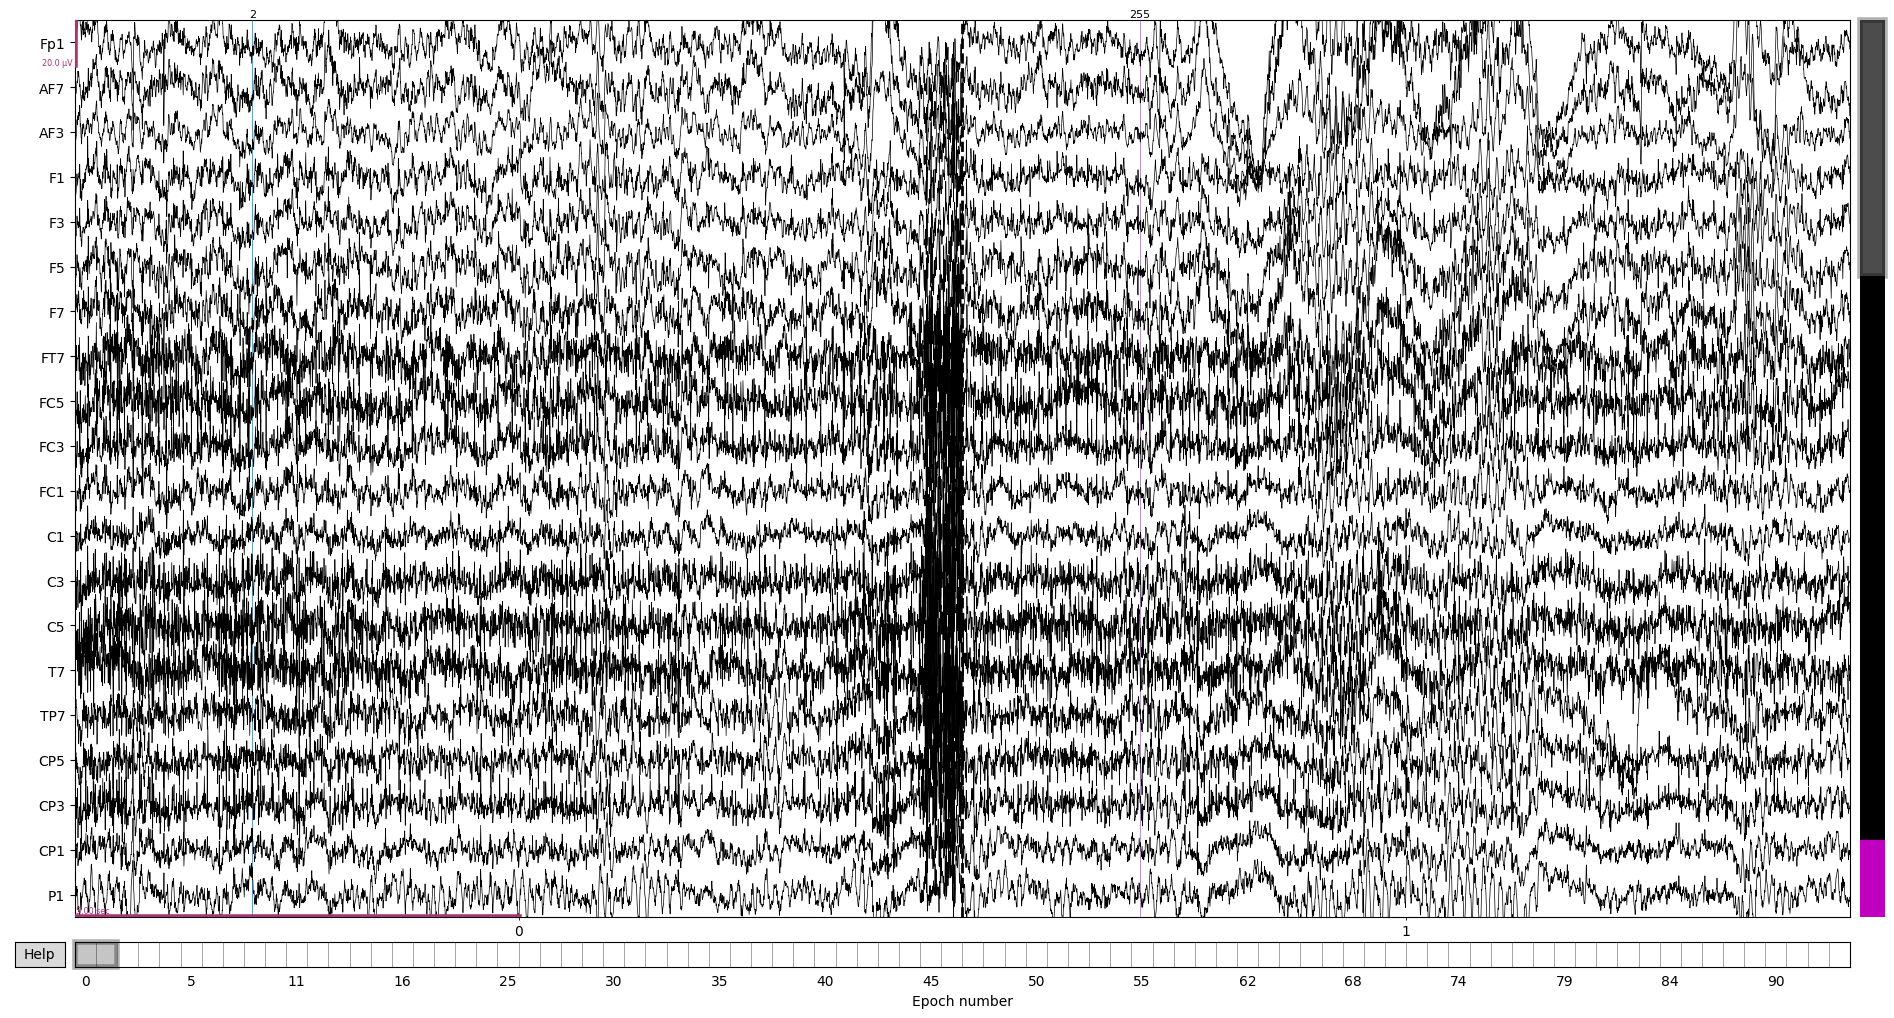

In [8]:
referenced.copy().filter(1,120, n_jobs=8).plot(n_channels=20, n_epochs=2, scalings=10e-6, events=referenced.events, picks=['eeg','ecg'])

In [9]:
referenced.save('referenced_epo.fif', overwrite=True)
del referenced

REMOVE ARTIFACTS


In [10]:
epochs = read_epochs('referenced_epo.fif')
# epochs.drop([0, 2, 47, 54, 55, 57, 66])

Reading C:\Users\Alberto\Documents\BCI\data\kmh\referenced_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7999.02 ms
        0 CTF compensation matrices available
Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


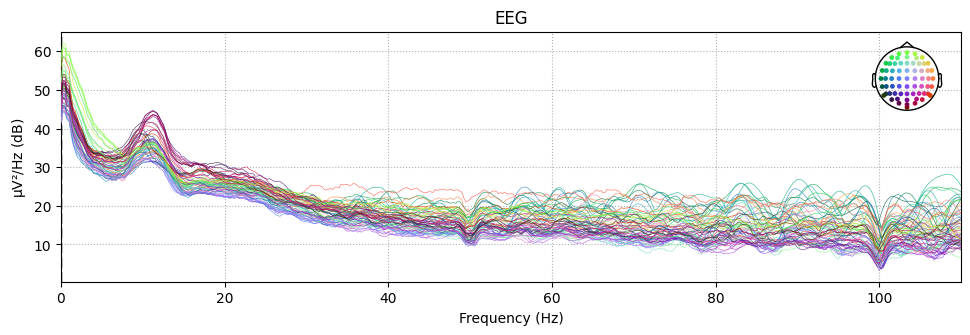

In [11]:
epochs['right'].plot_psd(fmax=110, tmin=0, tmax=4)

EOG Regression

No projector specified for this dataset. Please consider the method self.add_proj.


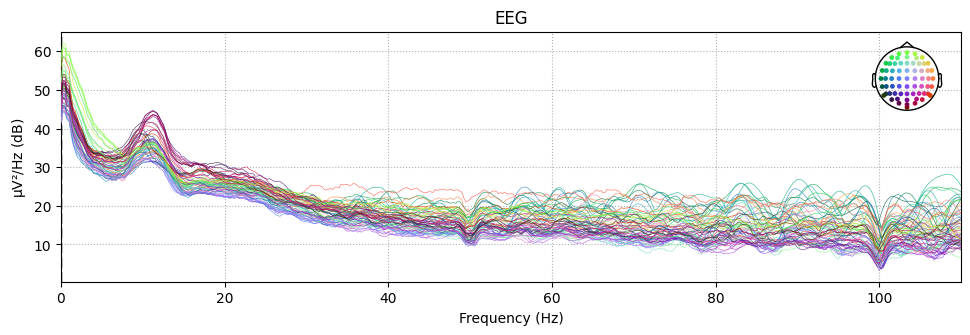

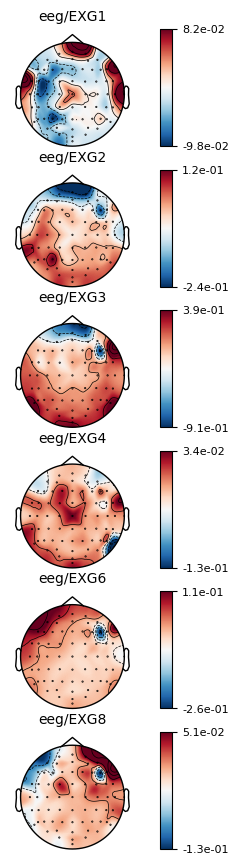

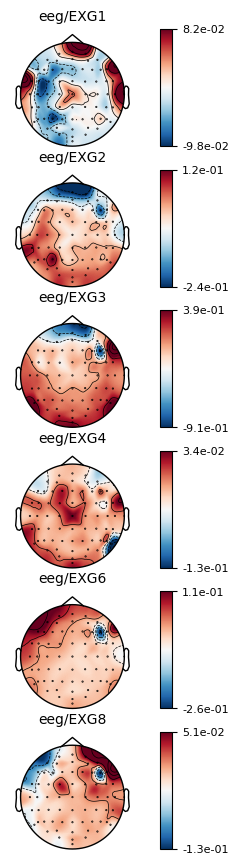

In [12]:
regressor = EOGRegression(
    picks='eeg', picks_artifact=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8']).fit(epochs)
regressor.plot()

ICA

In [13]:
filtered = epochs.copy().filter(1,120, n_jobs=8)
filtered.apply_baseline((-1.4,-0.1))
filtered.crop(-0.5,2)
ica = ICA(n_components=10, method='picard')
ica.fit(filtered)

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1528 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 5214 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done 5376 out of 5376 | elapsed:    4.9s finished


Applying baseline correction (mode: mean)
Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\Alberto\AppData\Local\Temp\ipykernel_13236\79998668.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(filtered)


Selecting by number: 10 components
Fitting ICA took 7.5s.


<ICA | epochs decomposition, method: picard (fit in 37 iterations on 215124 samples), 10 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

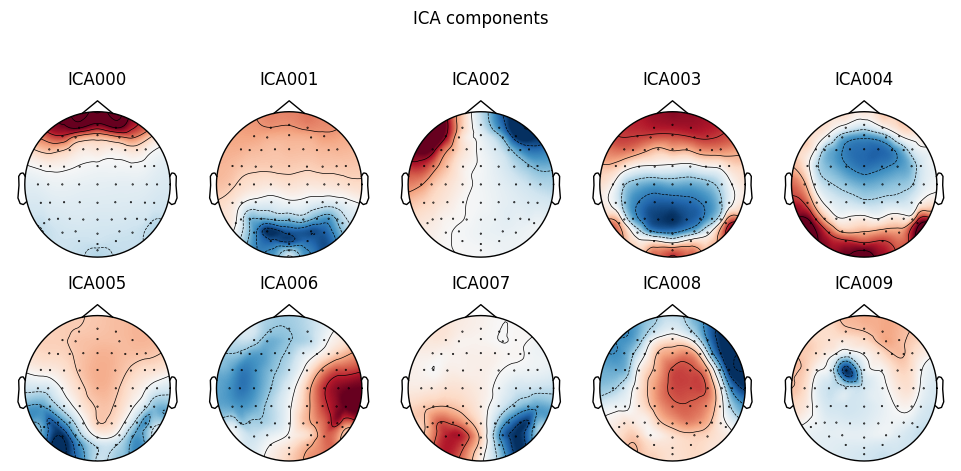

[<MNEFigure size 975x496 with 10 Axes>]

In [14]:
plot_ica_components(ica)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_13236\3695173692.py:2: RuntimeWarning: filter_length (3381) is longer than the signal (1946), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False),


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection i

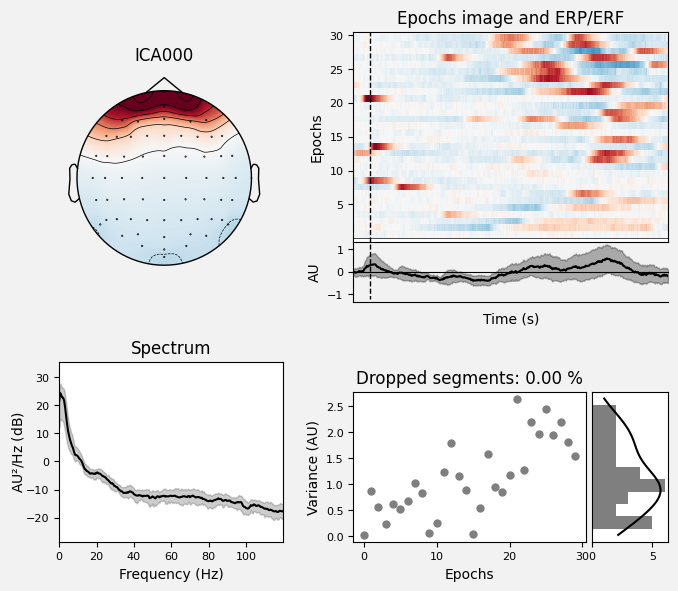

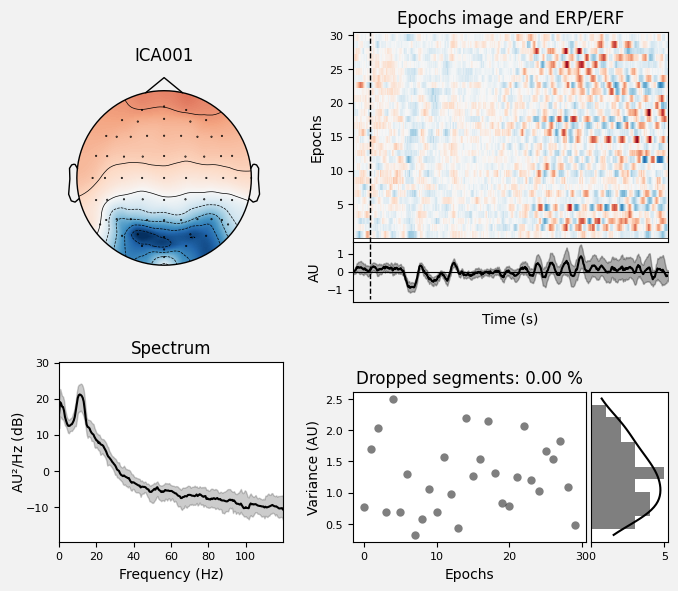

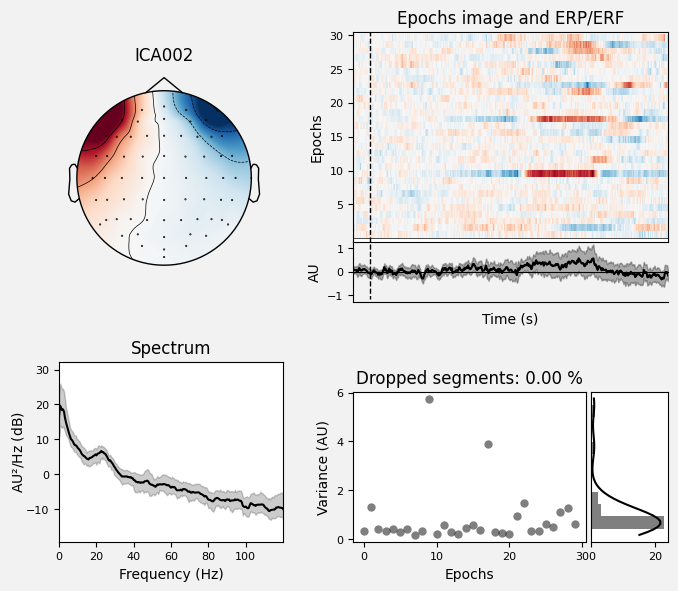

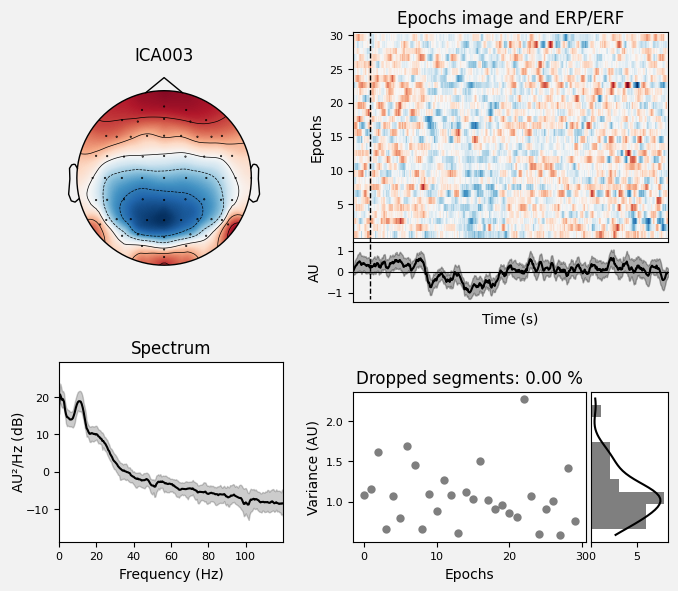

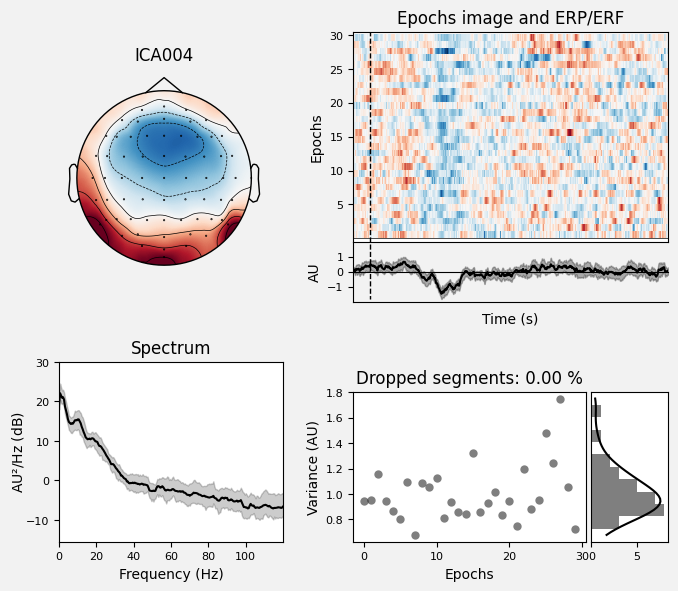

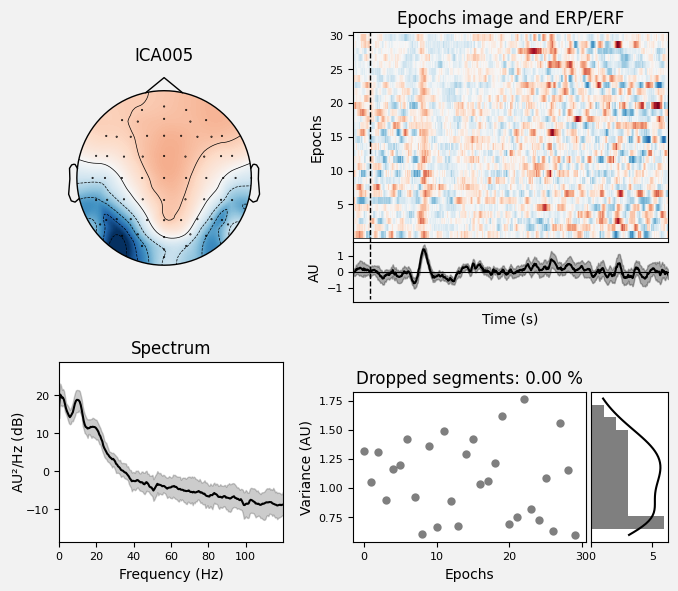

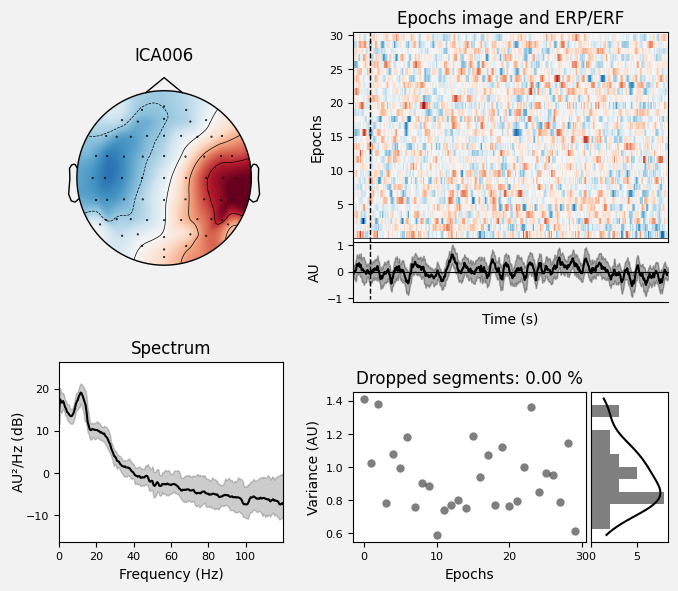

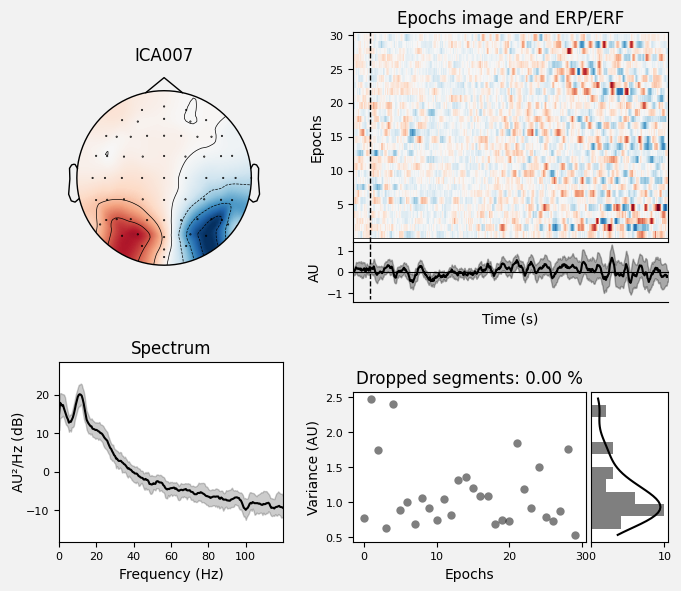

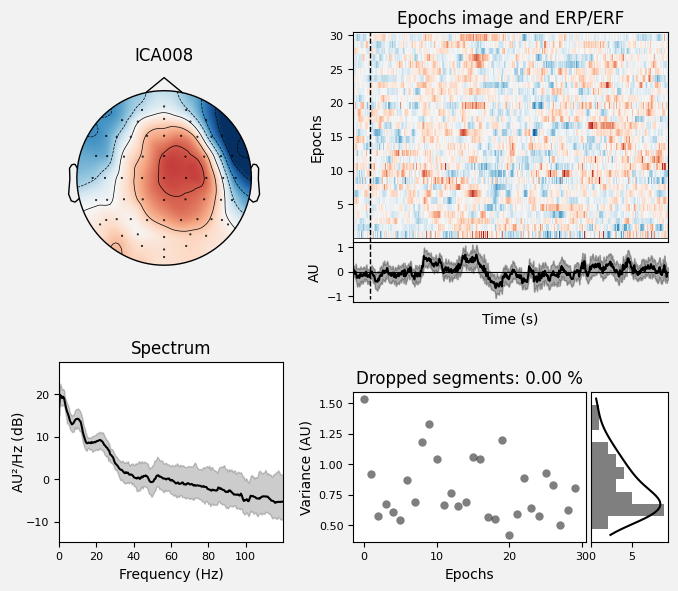

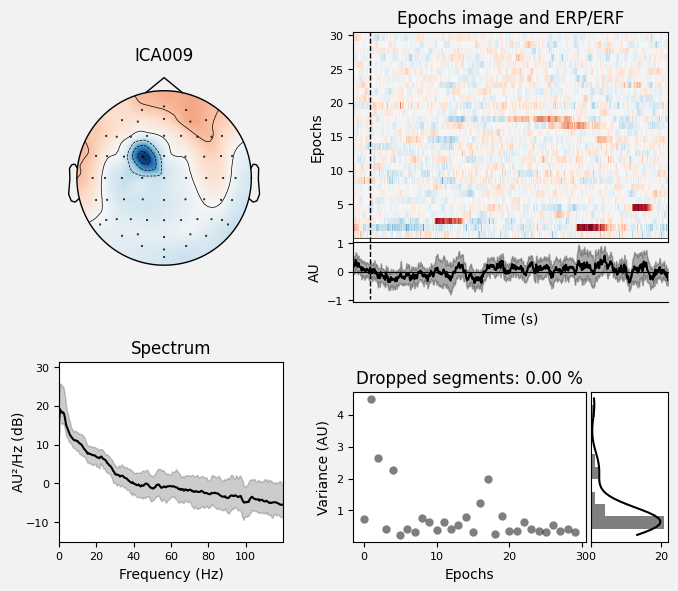

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [18]:
ica.plot_properties(
    epochs['left','right'].copy().crop(-0.1,1.8).filter(1,120, verbose=False), 
    picks = [0,1,2,3,4,5,6,7,8,9], 
    log_scale = False,
    psd_args = dict(fmax=120))

In [16]:
eog_indices, eog_scores = ica.find_bads_eog(
    filtered['r_pinch'],
    ch_name=['EXG1','EXG2','EXG3','EXG4','EXG6','EXG8'], 
    measure='zscore',
    threshold=2)


Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG6, EXG8


In [17]:
eog_indices


[0]

In [19]:
ica.apply(epochs, exclude=np.unique([0,2,9]))

Applying ICA to Epochs instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


<EpochsFIF |  84 events (all good), -2 - 7.99902 sec, baseline off, ~479.2 MB, data loaded,
 'r_pinch': 17
 'r_stop': 16
 'left': 16
 'right': 14
 'rest': 21>

ERP

Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 3381 samples (3.302 sec)



C:\Users\Alberto\AppData\Local\Temp\ipykernel_13236\3154141180.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (3073), distortion is likely. Reduce filter length or filter a longer signal.
  epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 1920 out of 1920 | elapsed:    3.2s finished


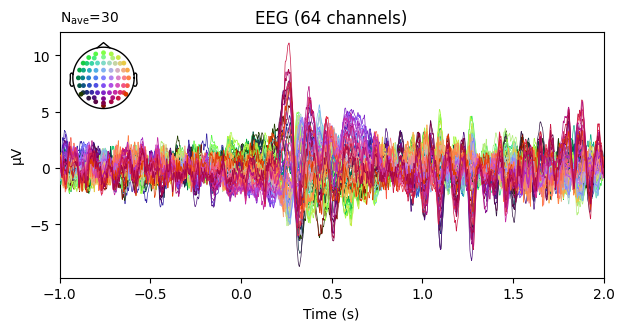

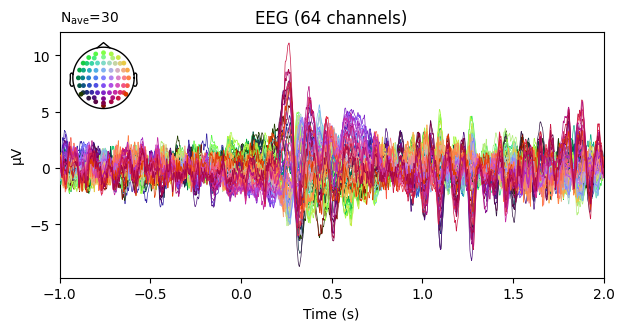

In [20]:
epochs['left','right'].copy().crop(-1,2).filter(1,120, n_jobs=8).average().plot()

Setting up band-pass filter from 2 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 1691 samples (1.651 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 928 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1344 out of 1344 | elapsed:    0.4s finished


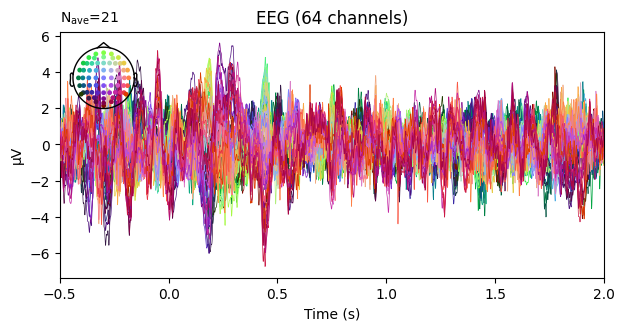

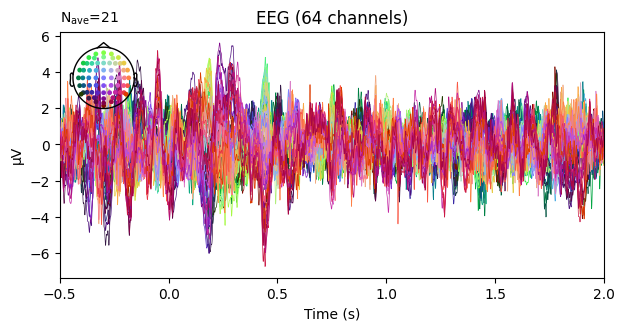

In [21]:
epochs['rest'].copy().crop(-0.5,2).filter(2,120, n_jobs=8).average().plot()

In [22]:
epochs.save('ica_epo.fif', overwrite=True)

In [45]:
epochs

<EpochsFIF |  55 events (all good), -2 - 7.99902 sec, baseline off, ~313.8 MB, data loaded,
 'r_pinch': 11
 'r_stop': 14
 'left': 13
 'right': 12
 'rest': 5>